<a href="https://colab.research.google.com/github/u1-byte/SmartCropYieldsPrediction/blob/main/Machine%20Learning/Code/%5BSuhu%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [113]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Cuaca.csv to Cuaca.csv


# **Provinsi Jatim**

In [446]:
# Input data Jatim
input_suhu_ratarata = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata.append(float(row[1]))
    number+=1

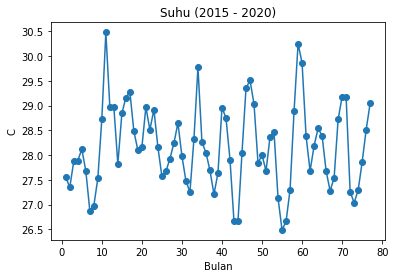

In [447]:
# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_ratarata,marker='o')
plt.title('Suhu (2015 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

In [448]:
# Input dari data pada database
dataset = []
counter=0

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    dataset.append([])
    dataset[counter].append(float(row[1]))
    counter+=1

dataset = np.array(dataset)

print(dataset)

[[27.55]
 [27.35]
 [27.88]
 [27.89]
 [28.12]
 [27.68]
 [26.88]
 [26.98]
 [27.53]
 [28.73]
 [30.48]
 [28.97]
 [28.97]
 [27.82]
 [28.84]
 [29.16]
 [29.28]
 [28.48]
 [28.1 ]
 [28.16]
 [28.97]
 [28.51]
 [28.92]
 [28.16]
 [27.57]
 [27.67]
 [27.93]
 [28.24]
 [28.65]
 [27.98]
 [27.48]
 [27.25]
 [28.33]
 [29.77]
 [28.26]
 [28.05]
 [27.69]
 [27.21]
 [27.64]
 [28.96]
 [28.75]
 [27.91]
 [26.66]
 [26.67]
 [28.05]
 [29.35]
 [29.51]
 [29.03]
 [27.84]
 [28.  ]
 [27.68]
 [28.37]
 [28.46]
 [27.13]
 [26.49]
 [26.66]
 [27.3 ]
 [28.89]
 [30.25]
 [29.86]
 [28.38]
 [27.68]
 [28.19]
 [28.54]
 [28.39]
 [27.68]
 [27.28]
 [27.54]
 [28.72]
 [29.18]
 [29.17]
 [27.26]
 [27.04]
 [27.29]
 [27.86]
 [28.51]
 [29.05]]


In [449]:
# Normalisasi dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [450]:
# Fungsi membuat sequence
def buat_sequences(dataset, window_size):
    input = []
    output = []

    for i in range(len(dataset)-window_size+1):
        window = dataset[i:(i+window_size-4), 0]
        input.append(window)
        output.append(dataset[(i+window_size-4):i+window_size, 0])
    return np.array(input),np.array(output)

window_size = 16
dataInput, dataOutput = buat_sequences(dataset, window_size)

print(len(dataInput))
print(len(dataOutput))

62
62


In [451]:
# Bagi data untuk training dan testing
input_train, input_test, output_train, output_test = train_test_split(dataInput, dataOutput, test_size=0.1, shuffle=False)

print(len(input_train))
print(len(input_test))

55
7


In [452]:
# Ubah dimensinya untuk disesuaikan dengan model
input_train = input_train.reshape((input_train.shape[0], 1, 1, 1, window_size-4))
input_test = input_test.reshape((input_test.shape[0], 1, 1, 1, window_size-4))

print(input_test)

[[[[[0.04260652 0.20300752 0.60150376 0.94235589 0.84461153 0.47368421
     0.29824561 0.42606516 0.51378446 0.47619048 0.29824561 0.19799499]]]]



 [[[[0.20300752 0.60150376 0.94235589 0.84461153 0.47368421 0.29824561
     0.42606516 0.51378446 0.47619048 0.29824561 0.19799499 0.26315789]]]]



 [[[[0.60150376 0.94235589 0.84461153 0.47368421 0.29824561 0.42606516
     0.51378446 0.47619048 0.29824561 0.19799499 0.26315789 0.55889724]]]]



 [[[[0.94235589 0.84461153 0.47368421 0.29824561 0.42606516 0.51378446
     0.47619048 0.29824561 0.19799499 0.26315789 0.55889724 0.67418546]]]]



 [[[[0.84461153 0.47368421 0.29824561 0.42606516 0.51378446 0.47619048
     0.29824561 0.19799499 0.26315789 0.55889724 0.67418546 0.6716792 ]]]]



 [[[[0.47368421 0.29824561 0.42606516 0.51378446 0.47619048 0.29824561
     0.19799499 0.26315789 0.55889724 0.67418546 0.6716792  0.19298246]]]]



 [[[[0.29824561 0.42606516 0.51378446 0.47619048 0.29824561 0.19799499
     0.26315789 0.55889724 0.674185

In [453]:
#model machine learning
model = tf.keras.models.Sequential([
  tf.keras.layers.ConvLSTM2D(filters=512, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, window_size-4)),   
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error',metrics=["mae"])

model.summary()

#fit the model
fitting_history = model.fit(input_train, output_train, validation_split=0.1, verbose=2, epochs=300)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_19 (ConvLSTM2D) (None, 1, 1, 512)         1075200   
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_78 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_79 (Dense)             (None, 4)               

<Figure size 432x288 with 0 Axes>

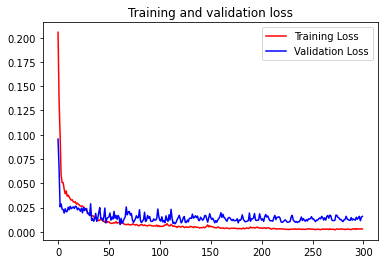

<Figure size 432x288 with 0 Axes>

In [454]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

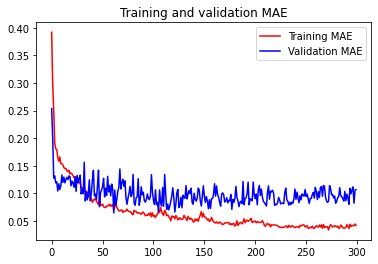

<Figure size 432x288 with 0 Axes>

In [455]:
# Grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [456]:
# Menghitung nilai MSE dan MAE
mse_score, mae_score = model.evaluate(input_test, output_test)
print('Nilai Mean Squared Error (MSE) : ', mse_score)
print('Nilai Mean Absolute Error (MAE) : ', mae_score)

1/1 [==============================] - 0s 18ms/step - loss: 0.0517 - mae: 0.1698
Nilai Mean Squared Error (MSE) :  0.05167336016893387
Nilai Mean Absolute Error (MAE) :  0.16975131630897522


In [457]:
# Simpan model
model.save('model-suhu.h5')

# **Testing Model**

In [458]:
# Load the model
model = tf.keras.models.load_model('model-suhu.h5')

In [459]:
#Prediksi Data
data_prediksi = model.predict(input_test)

In [460]:
print(data_prediksi)
print("-------")
print(output_test)

[[0.07171237 0.10461358 0.4324149  0.7367726 ]
 [0.17196679 0.39547193 0.6689391  0.7392242 ]
 [0.73108256 0.7577874  0.5627556  0.3132171 ]
 [0.7154031  0.62946606 0.40283316 0.23006631]
 [0.4603744  0.35316086 0.25298673 0.2517079 ]
 [0.16710138 0.30409786 0.47675836 0.5401704 ]
 [0.16948989 0.37126404 0.5358875  0.5342385 ]]
-------
[[0.26315789 0.55889724 0.67418546 0.6716792 ]
 [0.55889724 0.67418546 0.6716792  0.19298246]
 [0.67418546 0.6716792  0.19298246 0.13784461]
 [0.6716792  0.19298246 0.13784461 0.20050125]
 [0.19298246 0.13784461 0.20050125 0.3433584 ]
 [0.13784461 0.20050125 0.3433584  0.50626566]
 [0.20050125 0.3433584  0.50626566 0.64160401]]


In [461]:
# Inverse transform data min max
data_prediksi = scaler.inverse_transform(data_prediksi)
output_test = scaler.inverse_transform(output_test)

In [462]:
print(data_prediksi)
print("-------")
print(output_test)

[[26.776133 26.90741  28.215336 29.429722]
 [27.176147 28.067934 29.159067 29.439505]
 [29.407019 29.51357  28.735395 27.739737]
 [29.344458 29.00157  28.097303 27.407965]
 [28.326893 27.89911  27.499418 27.494314]
 [27.156734 27.703352 28.392265 28.645279]
 [27.166264 27.971344 28.628191 28.62161 ]]
-------
[[27.54 28.72 29.18 29.17]
 [28.72 29.18 29.17 27.26]
 [29.18 29.17 27.26 27.04]
 [29.17 27.26 27.04 27.29]
 [27.26 27.04 27.29 27.86]
 [27.04 27.29 27.86 28.51]
 [27.29 27.86 28.51 29.05]]


[27.54, 28.72, 29.18, 29.17]
[1, 2, 3, 4]
[26.776133, 26.90741, 28.215336, 29.429722]
[1, 2, 3, 4]


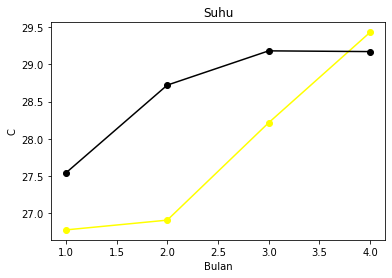

In [463]:
temp_test=[]
number=[]
count=1

for j in output_test[0]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[0]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[28.72, 29.18, 29.17, 27.26]
[1, 2, 3, 4]
[27.176147, 28.067934, 29.159067, 29.439505]
[1, 2, 3, 4]


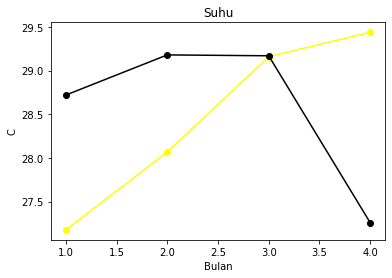

In [464]:
temp_test=[]
number=[]
count=1

for j in output_test[1]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[1]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[29.18, 29.17, 27.26, 27.04]
[1, 2, 3, 4]
[29.407019, 29.51357, 28.735395, 27.739737]
[1, 2, 3, 4]


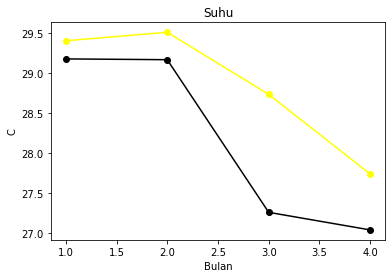

In [465]:
temp_test=[]
number=[]
count=1

for j in output_test[2]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[2]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[29.17, 27.26, 27.04, 27.29]
[1, 2, 3, 4]
[29.344458, 29.00157, 28.097303, 27.407965]
[1, 2, 3, 4]


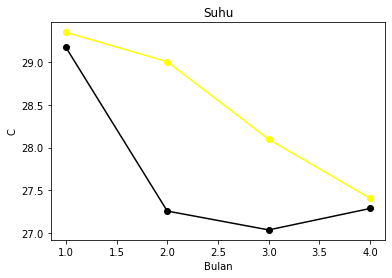

In [466]:
temp_test=[]
number=[]
count=1

for j in output_test[3]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[3]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[27.26, 27.04, 27.29, 27.86]
[1, 2, 3, 4]
[28.326893, 27.89911, 27.499418, 27.494314]
[1, 2, 3, 4]


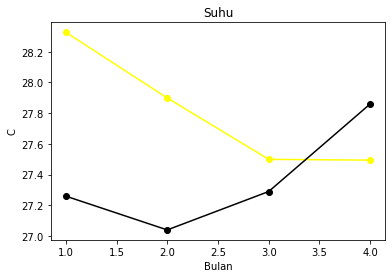

In [467]:
temp_test=[]
number=[]
count=1

for j in output_test[4]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[4]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[27.04, 27.29, 27.86, 28.51]
[1, 2, 3, 4]
[27.156734, 27.703352, 28.392265, 28.645279]
[1, 2, 3, 4]


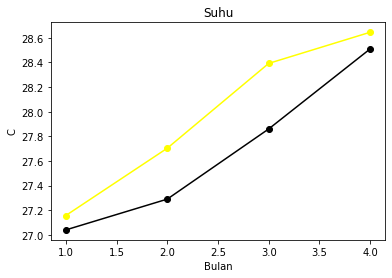

In [468]:
temp_test=[]
number=[]
count=1

for j in output_test[5]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[5]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[27.29, 27.86, 28.51, 29.05]
[1, 2, 3, 4]
[27.166264, 27.971344, 28.628191, 28.62161]
[1, 2, 3, 4]


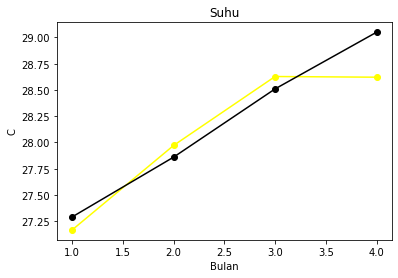

In [469]:
temp_test=[]
number=[]
count=1

for j in output_test[6]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[6]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()